<a href="https://colab.research.google.com/github/Nelson-Muteti/Trump-Twitter-Insults/blob/main/Trump_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [40]:
url = '/content/trump_insult_tweets_2014_to_2021.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10360 non-null  int64 
 1   date        10360 non-null  object
 2   target      10358 non-null  object
 3   insult      10360 non-null  object
 4   tweet       10360 non-null  object
dtypes: int64(1), object(4)
memory usage: 404.8+ KB


In [42]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  10360 non-null  int64         
 1   date        10360 non-null  datetime64[ns]
 2   target      10358 non-null  object        
 3   insult      10360 non-null  object        
 4   tweet       10360 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 404.8+ KB


In [43]:
df.shape

(10360, 5)

In [44]:
df.columns

Index(['Unnamed: 0', 'date', 'target', 'insult', 'tweet'], dtype='object')

In [45]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [46]:
df.head()

,date,target,insult,tweet
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [47]:
df.isnull().sum()

date      0
target    2
insult    0
tweet     0
dtype: int64

In [48]:
df = df.dropna()

In [49]:
df.isnull().sum()

date      0
target    0
insult    0
tweet     0
dtype: int64

In [50]:
#who was the most insulted 
newdf = df.groupby(['target']).size()
newdf = newdf.to_frame(name = 'COUNT').reset_index()
newdf = newdf.sort_values(by = 'COUNT', ascending = False)
newdf.head(10)

,target,COUNT
770,the-media,1287
223,democrats,647
331,hillary-clinton,625
802,trump-russia,441
394,joe-biden,402
771,the-new-york-times,392
162,cnn,295
347,impeachment-inquiry,247
11,adam-schiff,143
2,2020-election,143


In [51]:
#most used insults 
newdf = df.groupby(['insult']).size()
newdf = newdf.to_frame(name = 'COUNT').reset_index()
newdf = newdf.sort_values(by = 'COUNT', ascending = False)
newdf.head(10)

,insult,COUNT
642,Fake News,430
403,Crooked,266
1618,Sleepy Joe,129
3541,failing,82
410,Crooked Hillary,77
2141,Witch Hunt,76
659,Fake News Media,71
500,Do Nothing Democrats,57
569,FAKE NEWS,52
1022,Impeachment Hoax,43


In [52]:
#what was the most common insult towards hillary
newdf = df.loc[df['target'] =='hillary-clinton']
newdf = newdf.groupby(['insult']).size()
newdf = newdf.to_frame(name = 'COUNT').reset_index()
newdf = newdf.sort_values(by = 'COUNT', ascending = False)
newdf.head()

,insult,COUNT
20,Crooked,264
23,Crooked Hillary,75
24,Crooked Hillary Clinton,9
21,Crooked H,6
151,incompetent,4


In [53]:
#what was the most common insult towards the media
newdf = df.loc[df['target'] =='the-media']
newdf = newdf.groupby(['insult']).size()
newdf = newdf.to_frame(name = 'COUNT').reset_index()
newdf = newdf.sort_values(by = 'COUNT', ascending = False)
newdf.head()

,insult,COUNT
66,Fake News,318
75,Fake News Media,70
137,Lamestream Media,33
40,FAKE NEWS,31
327,dishonest,23


In [54]:
#what was the most common insult towards cnn
newdf = df.loc[df['target'] =='cnn']
newdf = newdf.groupby(['insult']).size()
newdf = newdf.to_frame(name = 'COUNT').reset_index()
newdf = newdf.sort_values(by = 'COUNT', ascending = False)
newdf.head()

,insult,COUNT
23,Fake News,46
26,Fake News CNN,7
19,FAKE NEWS,6
25,Fake News @CNN,5
1,#FakeNews,3


In [55]:
#get a list of all targets of  Trump insults
list(df['target'])

['thomas-frieden',
 'thomas-frieden',
 'politicians',
 'ben-cardin',
 'neil-young',
 'rockin-in-the-free-world',
 'willie-geist',
 'jeb-bush',
 'molly-sims',
 'nicole-wallace',
 'the-view',
 'the-view',
 'nicole-wallace',
 'the-view',
 'lawrence-o-donnell',
 'lawrence-o-donnell',
 'rick-scott',
 'john-roberts',
 'univision',
 'john-roberts',
 'new-york-daily-news',
 'mort-zuckerman',
 'new-york-daily-news',
 'saudi-arabia',
 'mexico',
 'mexico',
 'macys',
 'george-pataki',
 'george-pataki',
 'macys',
 'macys',
 'macys',
 'macys',
 'macys',
 'barack-obama',
 'southern-border',
 'southern-border',
 'juan-williams',
 'paulina-vega',
 'rick-perry',
 'rick-perry',
 'jeb-bush',
 'united-states',
 'macys',
 'charles-krauthammer',
 'charles-krauthammer',
 'george-w-bush',
 'george-w-bush',
 'clare-o-connor',
 'forbes',
 'clare-o-connor',
 'forbes',
 'clare-o-connor',
 'forbes',
 'forbes',
 'barack-obama',
 'republicans',
 'iran',
 'jeb-bush-supporters',
 'macys',
 'univision',
 'univision',
 '

In [56]:
#trump insults late Fox news legal contributor Charles Krauthammer
newdf = df.loc[df['target'] =='charles-krauthammer']
newdf = newdf.groupby(['insult']).size()
newdf = newdf.to_frame(name = 'COUNT').reset_index()
newdf = newdf.sort_values(by = 'COUNT', ascending = False)
newdf

,insult,COUNT
6,highly overrated,2
0,Iraq war monger,1
1,a @FoxNews flunky,1
2,a dope,1
3,biased,1
4,clown,1
5,dopey,1
7,should be fired,1


In [57]:
#trump insults late Fox news legal contributor Charles Krauthammer
newdf = df.loc[df['target'] =='charles-krauthammer']
newdf.tweet

44     Do you believe that highly overrated political...
45     Do you believe that highly overrated political...
190     ....Dopey @krauthammer should be fired. @FoxNews
191     ....Dopey @krauthammer should be fired. @FoxNews
192    The hatred that clown @krauthammer has for me ...
654    @oreillyfactor, horrible defense of me against...
660    Between Iraq war monger @krauthammer, dummy @K...
897    Watching biased Charles @krauthammer, a @FoxNe...
898    Watching biased Charles @krauthammer, a @FoxNe...
Name: tweet, dtype: object

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

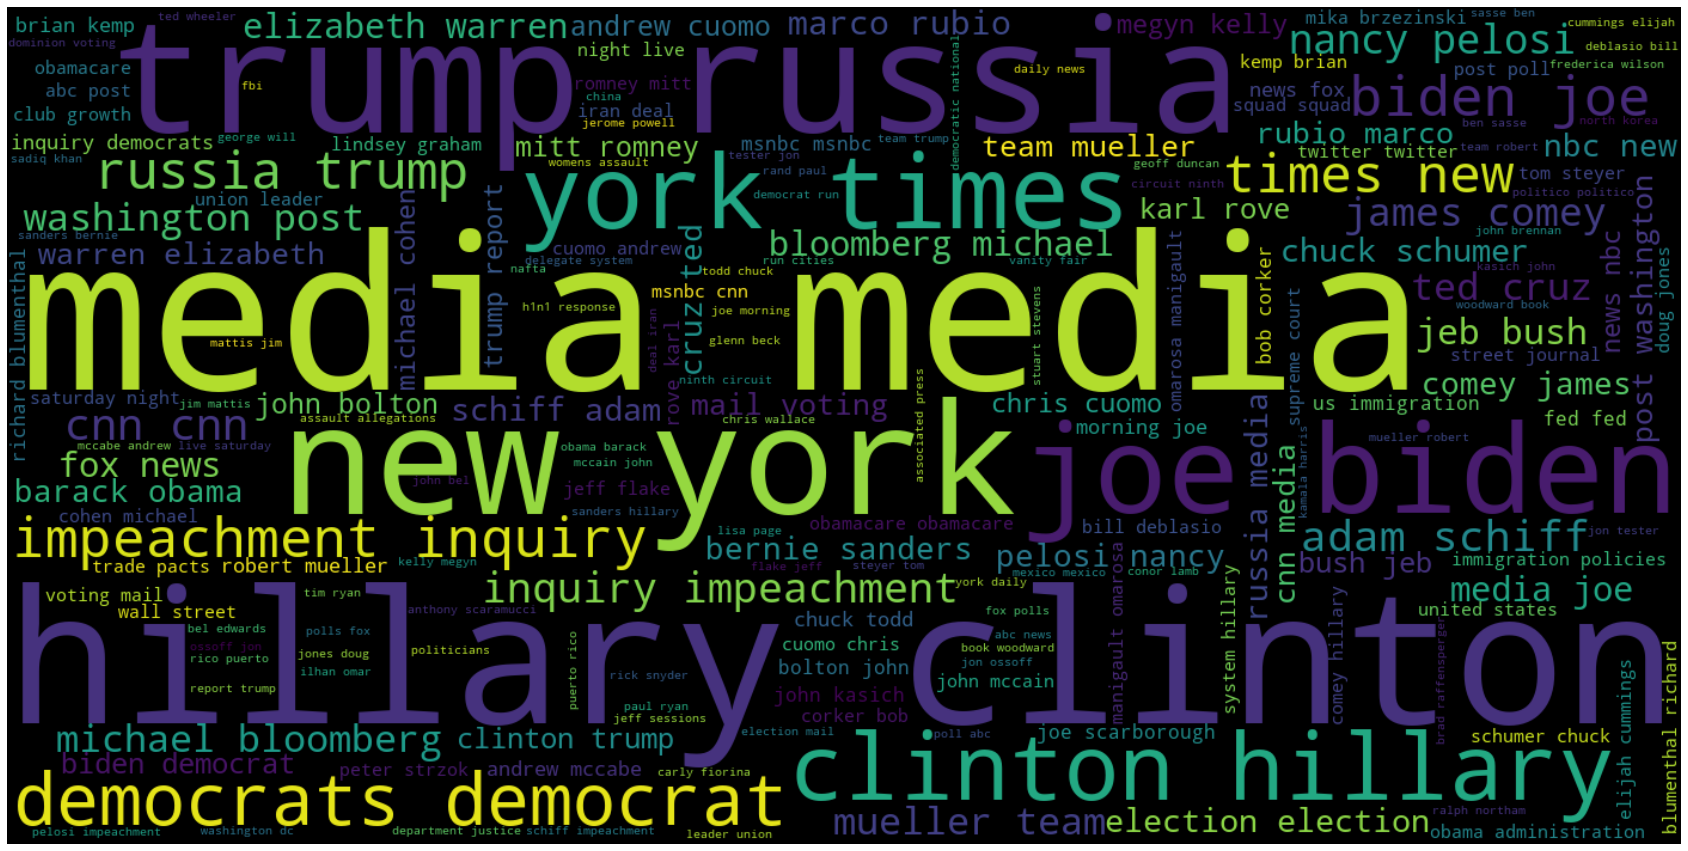

In [59]:
#get a word cloud representation of Trump insult targets
target_text = " ".join(df.target)
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

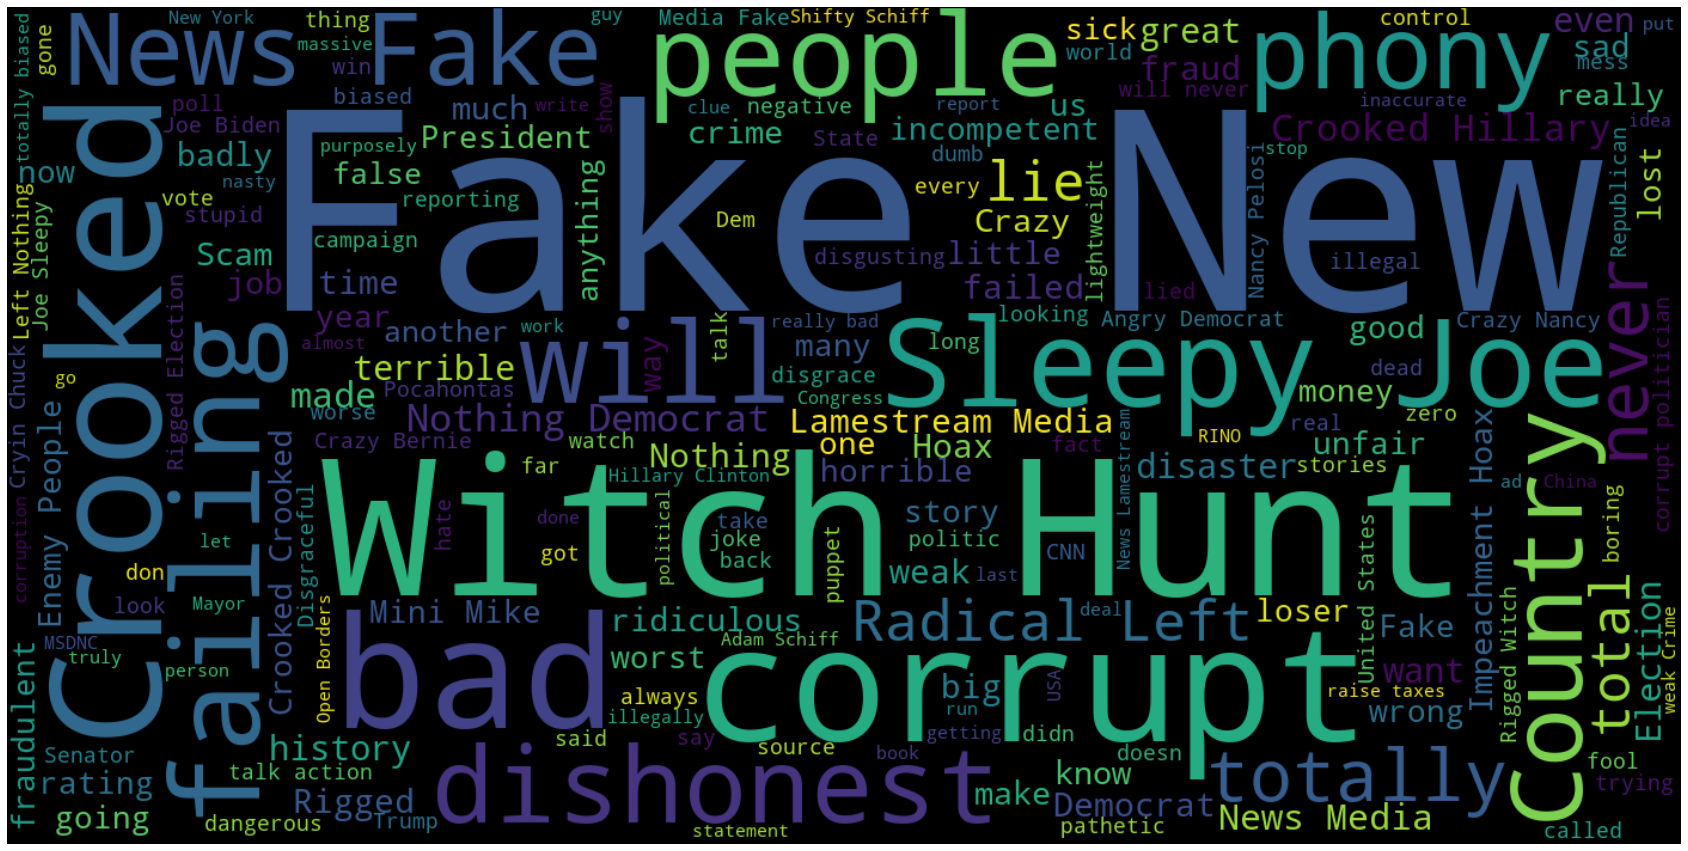

In [61]:
#get a word cloud representation of Trump insults
target_text = " ".join(df.insult)
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [62]:
df.to_csv('trump_tweets.csv')